In [ ]:
import numpy as np
import pandas as pd

results = pd.read_csv('Prediction/evaluation_metrics.csv')

In [3]:
results

,Feature_set,Embeddings,Dim_reduction,Model,MSE
0,A,-,-,LightGBM,21608.745003
1,B,bodyText,orig,LightGBM,20862.665131
2,B,bodyText,pca,LightGBM,20820.148873
3,B,chunking,orig,LightGBM,20862.665131
4,B,chunking,pca,LightGBM,20824.572243
...,...,...,...,...,...
83,C,paragraphs,pca,SARIMAX,3994.778622
84,D,bodyText,pca,SARIMAX,4839.386842
85,D,chunking,pca,SARIMAX,3858.753400
86,D,headlines,pca,SARIMAX,6680.211604


Feature Set별 평균 MSE
             Average_MSE    Std_MSE  Count
Feature_set                               
A                8517.48    9013.75      4
D               20508.23   29885.87     28
C              119035.87  176993.02     28
B              120051.38  179759.00     28




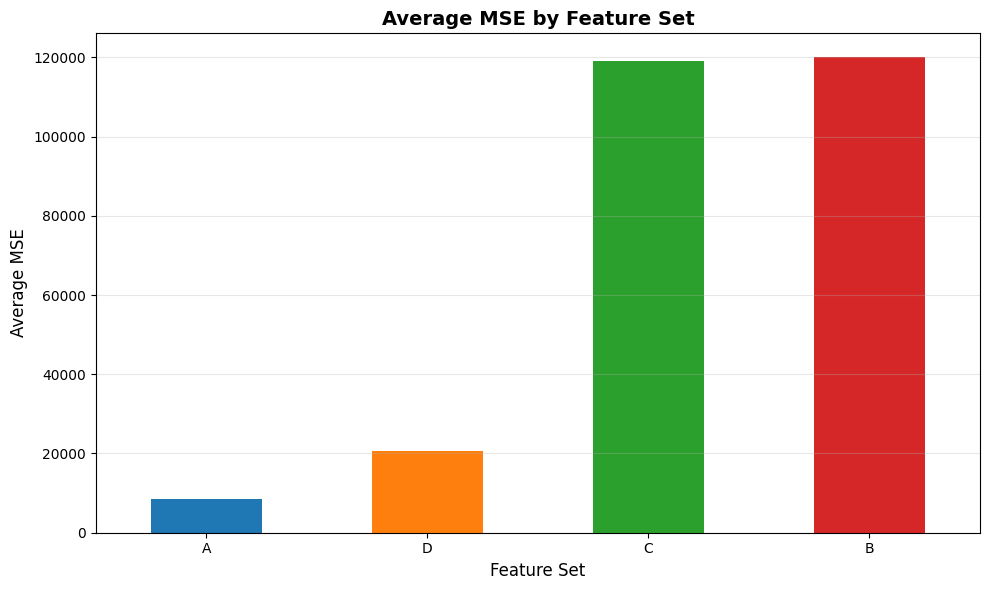

In [4]:
# Feature_set (A, B, C, D) 별 평균 MSE
feature_set_avg = results.groupby('Feature_set')['MSE'].agg(['mean', 'std', 'count']).round(2)
feature_set_avg.columns = ['Average_MSE', 'Std_MSE', 'Count']
feature_set_avg = feature_set_avg.sort_values('Average_MSE')

print("="*60)
print("Feature Set별 평균 MSE")
print("="*60)
print(feature_set_avg)
print("\n")

# 시각화 (선택사항)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feature_set_avg['Average_MSE'].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Average MSE by Feature Set', fontsize=14, fontweight='bold')
plt.xlabel('Feature Set', fontsize=12)
plt.ylabel('Average MSE', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Embeddings별 평균 MSE
            Average_MSE    Std_MSE  Count
Embeddings                               
none            5241.40        NaN      1
headlines      84951.65  157745.29     21
paragraphs     86615.96  150735.68     21
chunking       87220.30  151202.32     21
bodyText       87339.39  160635.09     21




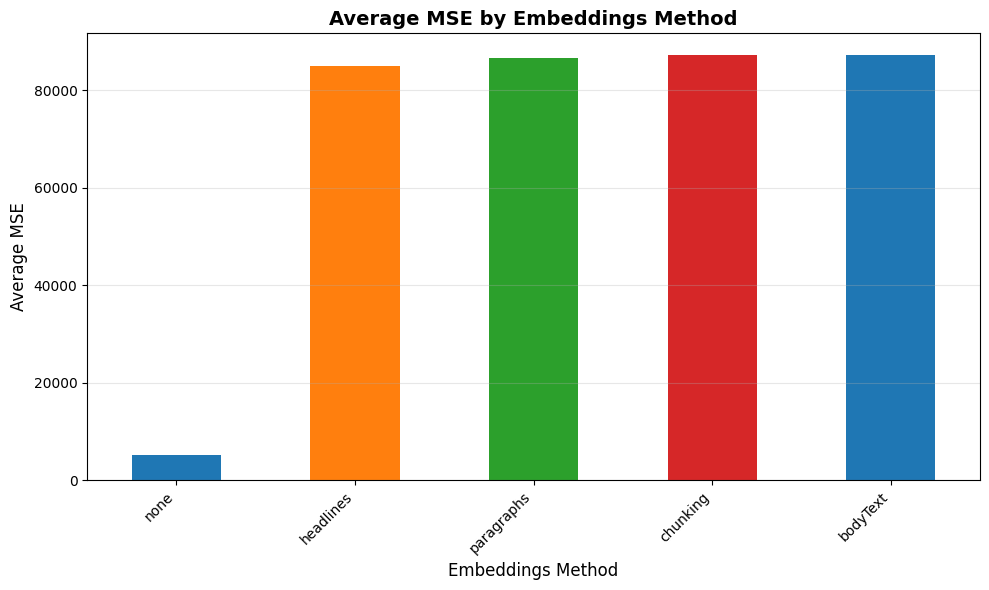

In [5]:
# Embeddings (bodyText, chunking, headlines, paragraphs) 별 평균 MSE
# '-'는 제외 (Dataset A는 임베딩 없음)
embeddings_avg = results[results['Embeddings'] != '-'].groupby('Embeddings')['MSE'].agg(['mean', 'std', 'count']).round(2)
embeddings_avg.columns = ['Average_MSE', 'Std_MSE', 'Count']
embeddings_avg = embeddings_avg.sort_values('Average_MSE')

print("="*60)
print("Embeddings별 평균 MSE")
print("="*60)
print(embeddings_avg)
print("\n")

# 시각화 (선택사항)
plt.figure(figsize=(10, 6))
embeddings_avg['Average_MSE'].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Average MSE by Embeddings Method', fontsize=14, fontweight='bold')
plt.xlabel('Embeddings Method', fontsize=12)
plt.ylabel('Average MSE', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Dimension Reduction별 평균 MSE
               Average_MSE    Std_MSE  Count
Dim_reduction                               
none               5241.40        NaN      1
pca               84403.05  158057.47     48
orig              89370.20  146464.90     36




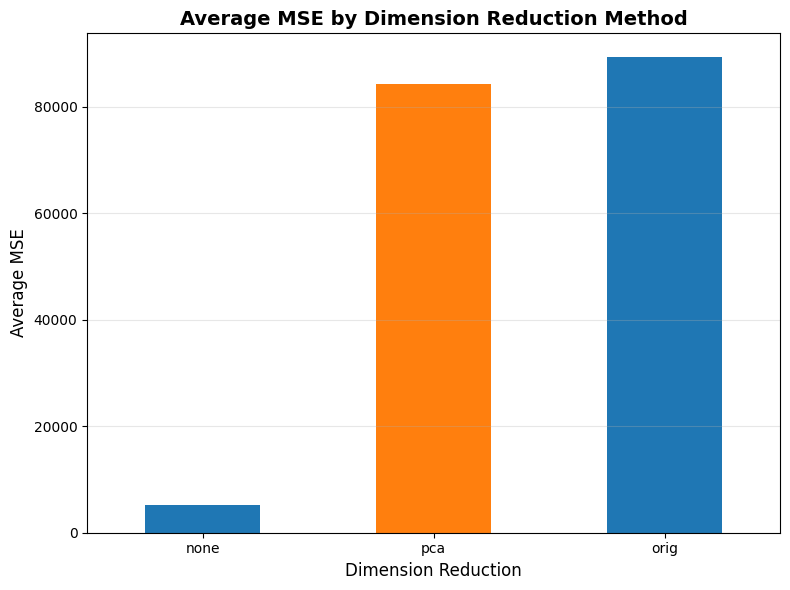

In [6]:
# Dim_reduction (orig, pca) 별 평균 MSE
# '-'는 제외 (Dataset A는 차원 축소 없음)
dim_reduction_avg = results[results['Dim_reduction'] != '-'].groupby('Dim_reduction')['MSE'].agg(['mean', 'std', 'count']).round(2)
dim_reduction_avg.columns = ['Average_MSE', 'Std_MSE', 'Count']
dim_reduction_avg = dim_reduction_avg.sort_values('Average_MSE')

print("="*60)
print("Dimension Reduction별 평균 MSE")
print("="*60)
print(dim_reduction_avg)
print("\n")

# 시각화 (선택사항)
plt.figure(figsize=(8, 6))
dim_reduction_avg['Average_MSE'].plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Average MSE by Dimension Reduction Method', fontsize=14, fontweight='bold')
plt.xlabel('Dimension Reduction', fontsize=12)
plt.ylabel('Average MSE', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Model별 평균 MSE
               Average_MSE    Std_MSE  Count
Model_unified                               
Linear             1029.89      99.75     25
SARIMAX            4991.05     964.44     13
LightGBM          20672.82     351.48     25
GRU              267811.69  176878.87     25


Original Model Names (참고)
Linear:
  - linear (19 rows)
  - Linear (3 rows)
  - Lasso_alpha0.1 (3 rows)
SARIMAX:
  - SARIMAX (13 rows)
LightGBM:
  - LightGBM (25 rows)
GRU:
  - GRU (25 rows)




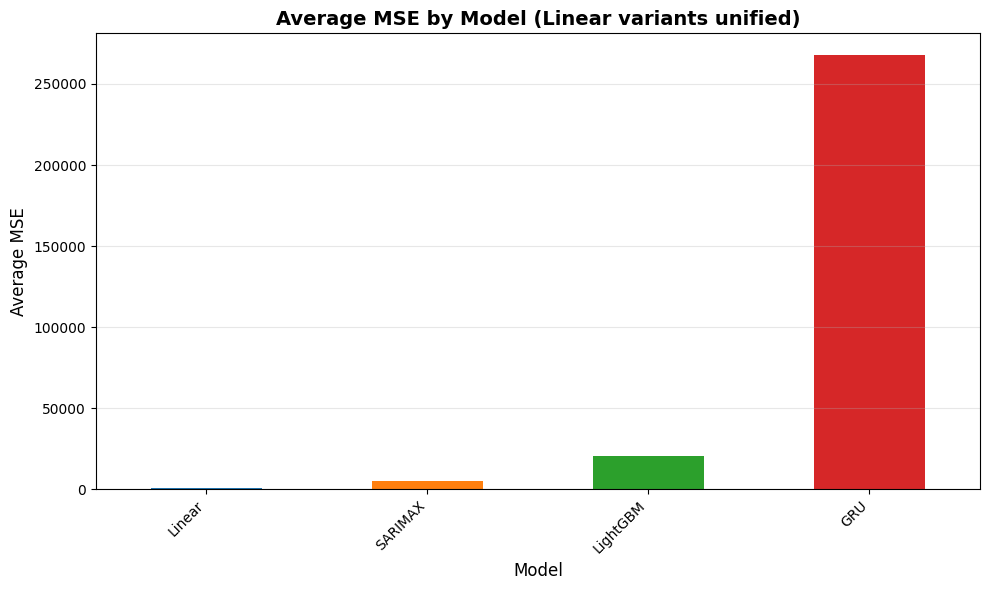

In [9]:
# Model별 평균 MSE 계산
# Linear 계열 모델들을 하나로 통합

# Linear 계열 모델 통합을 위한 전처리
results_clean = results.copy()

# Linear로 시작하거나 Ridge, Lasso를 포함하는 모델명을 'Linear'로 통합
def unify_model_name(model_name):
    """
    Linear 계열 모델명을 통합
    - Linear, Ridge*, Lasso* → 'Linear'
    - 나머지는 그대로
    """
    if pd.isna(model_name):
        return model_name
    
    model_str = str(model_name)
    
    # Linear 계열 체크
    if model_str.startswith('Linear') or \
       model_str.startswith('linear') or \
       model_str.startswith('Ridge') or \
       model_str.startswith('Lasso'):
        return 'Linear'
    else:
        return model_str

# 모델명 통합 적용
results_clean['Model_unified'] = results_clean['Model'].apply(unify_model_name)

# Model별 groupby
model_avg = results_clean.groupby('Model_unified')['MSE'].agg(['mean', 'std', 'count']).round(2)
model_avg.columns = ['Average_MSE', 'Std_MSE', 'Count']
model_avg = model_avg.sort_values('Average_MSE')

print("="*60)
print("Model별 평균 MSE")
print("="*60)
print(model_avg)
print("\n")

# 각 모델의 원래 이름들 확인 (참고용)
print("="*60)
print("Original Model Names (참고)")
print("="*60)
for unified_name in model_avg.index:
    original_names = results[results_clean['Model_unified'] == unified_name]['Model'].unique()
    print(f"{unified_name}:")
    for orig in original_names:
        count = len(results[(results_clean['Model_unified'] == unified_name) & (results['Model'] == orig)])
        print(f"  - {orig} ({count} rows)")
print("\n")

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
model_avg['Average_MSE'].plot(kind='bar', color=colors[:len(model_avg)])
plt.title('Average MSE by Model (Linear variants unified)', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Average MSE', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()